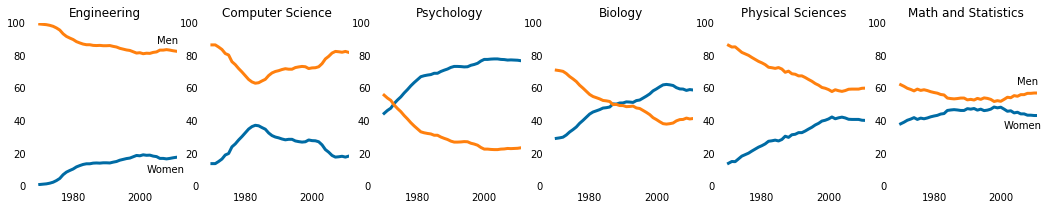

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

In [2]:
women_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

# Grid - Step 1
Because there are seventeen degrees that we need to generate line charts for, 
we'll use a subplot grid layout of 6 rows by 3 columns. We can then group the degrees into STEM, liberal arts, and other, in the following way.

In [3]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

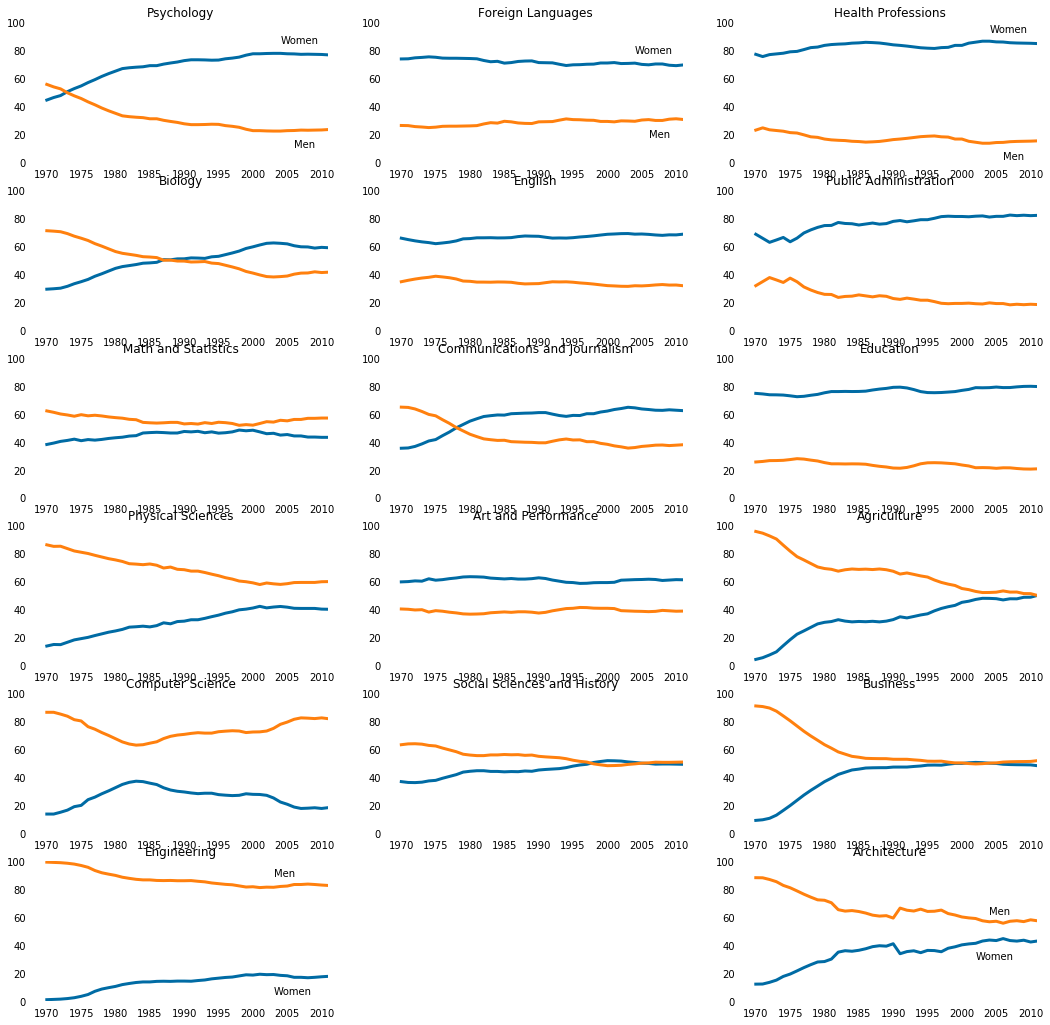

In [4]:
fig = plt.figure(figsize=(18, 18))

all_cats = [stem_cats, lib_arts_cats, other_cats]

# stem_cats
for c in range(0, 3):
    series = all_cats[c]
    for sp in range(0, len(series)):
        position = sp * 3 + c + 1
        ax = fig.add_subplot(6, 3, position)
        ax.plot(women_degrees['Year'], women_degrees[series[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[series[sp]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_title(series[sp])
        ax.tick_params(bottom="off", top="off", left="off", right="off")

        if sp == 0:
            if c == 0:
                ax.text(2004, 85, 'Women')
                ax.text(2006, 11, 'Men')
            elif c == 1:
                ax.text(2004, 78, 'Women')
                ax.text(2006, 18, 'Men')
            elif c == 2:
                ax.text(2004, 93, 'Women')
                ax.text(2006, 2, 'Men')
        elif sp == len(series) - 1:
            if c == 0:
                ax.text(2003, 89, 'Men')
                ax.text(2003, 5, 'Women')
            if c == 2:
                ax.text(2004, 62, 'Men')
                ax.text(2002, 30, 'Women')

            

# Grid - Step 2
With seventeen line charts in one diagram, the non-data elements quickly clutter the field of view. 
The most immediate issue that sticks out is the titles of some line charts 
overlapping with the x-axis labels for the line chart above it. 
If we remove the titles for each line chart, 
the viewer won't know what degree each line chart refers to. 

Let's instead remove the x-axis labels for every line chart in a column 
except for the bottom most one. We can accomplish this by modifying 
the call to `Axes.tick_params()` and setting `labelbottom` to `off`:

```
ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
```

This will disable the x-axis labels for all of the line charts. You can then enable the x-axis labels for the bottommost line charts in each column:

```
ax.tick_params(labelbottom='on')
```

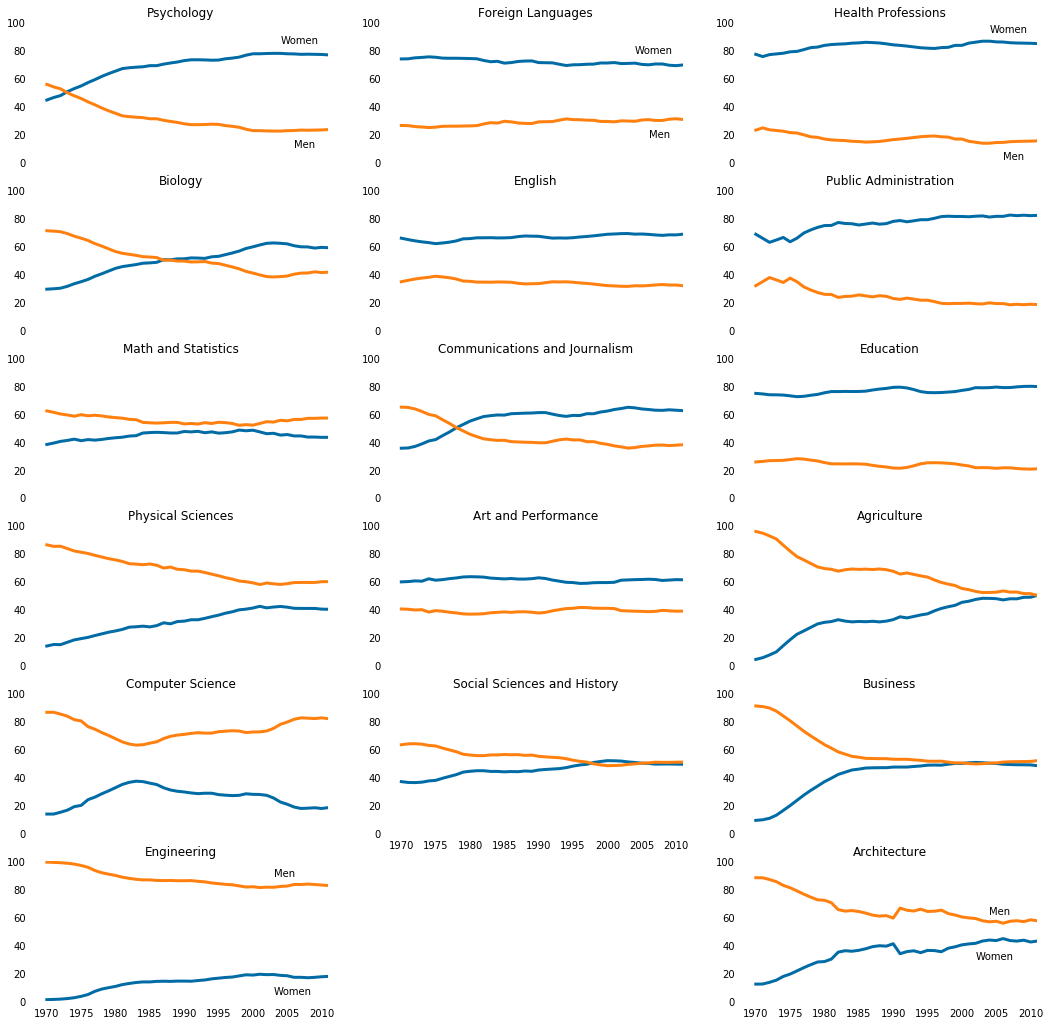

In [5]:
fig = plt.figure(figsize=(18, 18))

all_cats = [stem_cats, lib_arts_cats, other_cats]

# stem_cats
for c in range(0, 3):
    series = all_cats[c]
    for sp in range(0, len(series)):
        position = sp * 3 + c + 1
        ax = fig.add_subplot(6, 3, position)
        ax.plot(women_degrees['Year'], women_degrees[series[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[series[sp]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_title(series[sp])
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
        
        if sp == len(series) - 1:
            ax.tick_params(labelbottom='on')

        if sp == 0:
            if c == 0:
                ax.text(2004, 85, 'Women')
                ax.text(2006, 11, 'Men')
            elif c == 1:
                ax.text(2004, 78, 'Women')
                ax.text(2006, 18, 'Men')
            elif c == 2:
                ax.text(2004, 93, 'Women')
                ax.text(2006, 2, 'Men')
        elif sp == len(series) - 1:
            if c == 0:
                ax.text(2003, 89, 'Men')
                ax.text(2003, 5, 'Women')
            if c == 2:
                ax.text(2004, 62, 'Men')
                ax.text(2002, 30, 'Women')


# Grid - Step 3
Removing the x-axis labels for all but the bottommost plots solved the issue we noticed with the overlapping text. In addition, the plots are cleaner and more readable. The trade-off we made is that it's now more difficult for the viewer to discern approximately which years some interesting changes in trends may have happened. This is acceptable because we're primarily interested in enabling the viewer to quickly get a high level understanding of which degrees are prone to gender imbalance and how has that changed over time.

In the vein of reducing cluttering, let's also simplify the y-axis labels. Currently, all seventeen plots have six y-axis labels and even though they are consistent across the plots, they still add to the visual clutter. By keeping just the starting and ending labels (0 and 100), we can keep some of the benefits of having the y-axis labels to begin with.

We can use the Axes.set_yticks() method to specify which labels we want displayed. The following code enables just the 0 and 100 labels to be displayed:

```
ax.set_yticks([0,100])
```

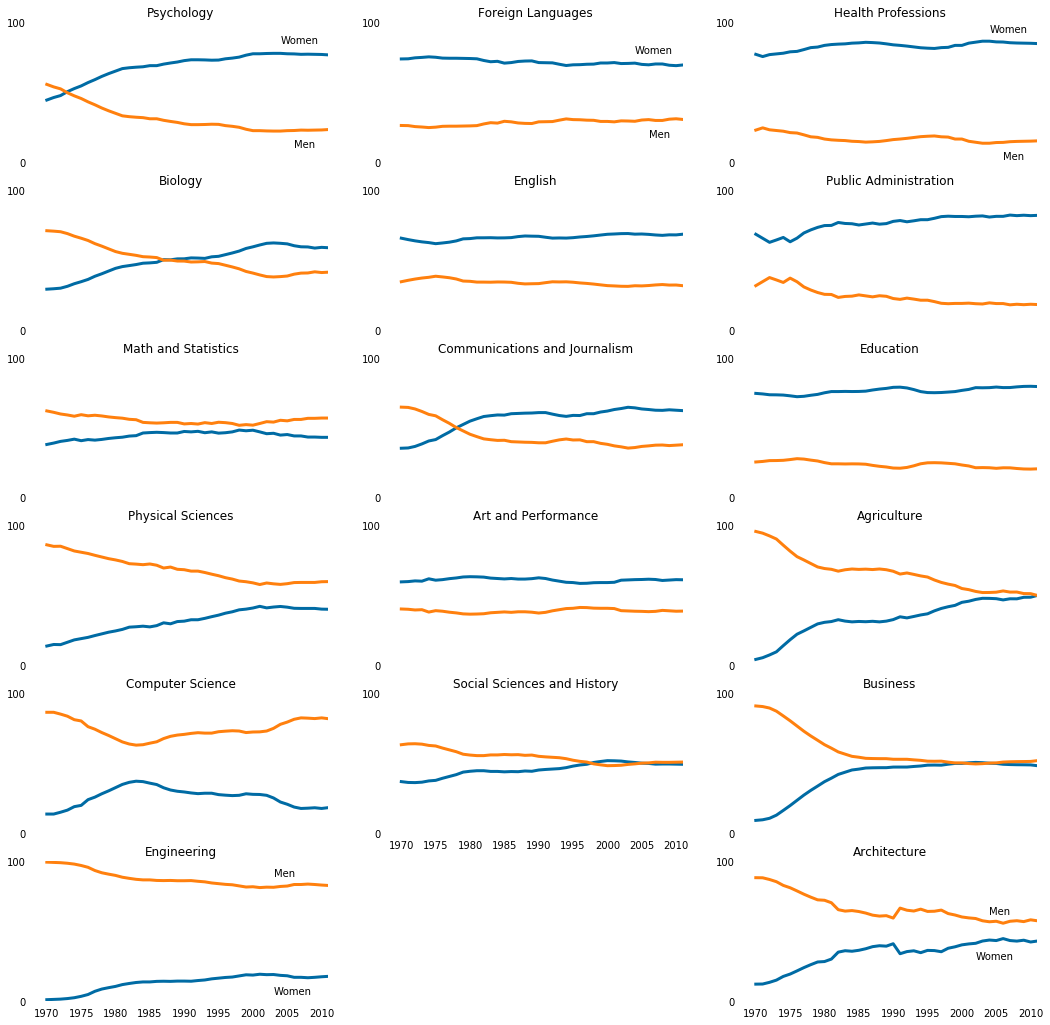

In [6]:
fig = plt.figure(figsize=(18, 18))

all_cats = [stem_cats, lib_arts_cats, other_cats]

# stem_cats
for c in range(0, 3):
    series = all_cats[c]
    for sp in range(0, len(series)):
        position = sp * 3 + c + 1
        ax = fig.add_subplot(6, 3, position)
        ax.plot(women_degrees['Year'], women_degrees[series[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[series[sp]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0,100])
        ax.set_title(series[sp])
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
        
        if sp == len(series) - 1:
            ax.tick_params(labelbottom='on')

        if sp == 0:
            if c == 0:
                ax.text(2004, 85, 'Women')
                ax.text(2006, 11, 'Men')
            elif c == 1:
                ax.text(2004, 78, 'Women')
                ax.text(2006, 18, 'Men')
            elif c == 2:
                ax.text(2004, 93, 'Women')
                ax.text(2006, 2, 'Men')
        elif sp == len(series) - 1:
            if c == 0:
                ax.text(2003, 89, 'Men')
                ax.text(2003, 5, 'Women')
            if c == 2:
                ax.text(2004, 62, 'Men')
                ax.text(2002, 30, 'Women')


# Grid - Step 4

While removing most of the y-axis labels definitely reduced clutter, it also made it hard to understand which degrees have close to 50-50 gender breakdown. While keeping all of the y-axis labels would have made it easier, we can actually do one better and use a horizontal line across all of the line charts where the y-axis label 50 would have been.

We can generate a horizontal line across an entire subplot using the Axes.axhline() method. The only required parameter is the y-axis location for the start of the line:

```
ax.axhline(50)
```

Let's use the next color in the Color Blind 10 palette for this horizontal line, which has an RGB value of (171, 171, 171). Because we don't want this line to clutter the viewing experience, let's increase the transparency of the line. We can set the color using the c parameter and the transparency using the `alpha` parameter. The value passed in to the `alpha` parameter must range between 0 and 1:

```
ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
```

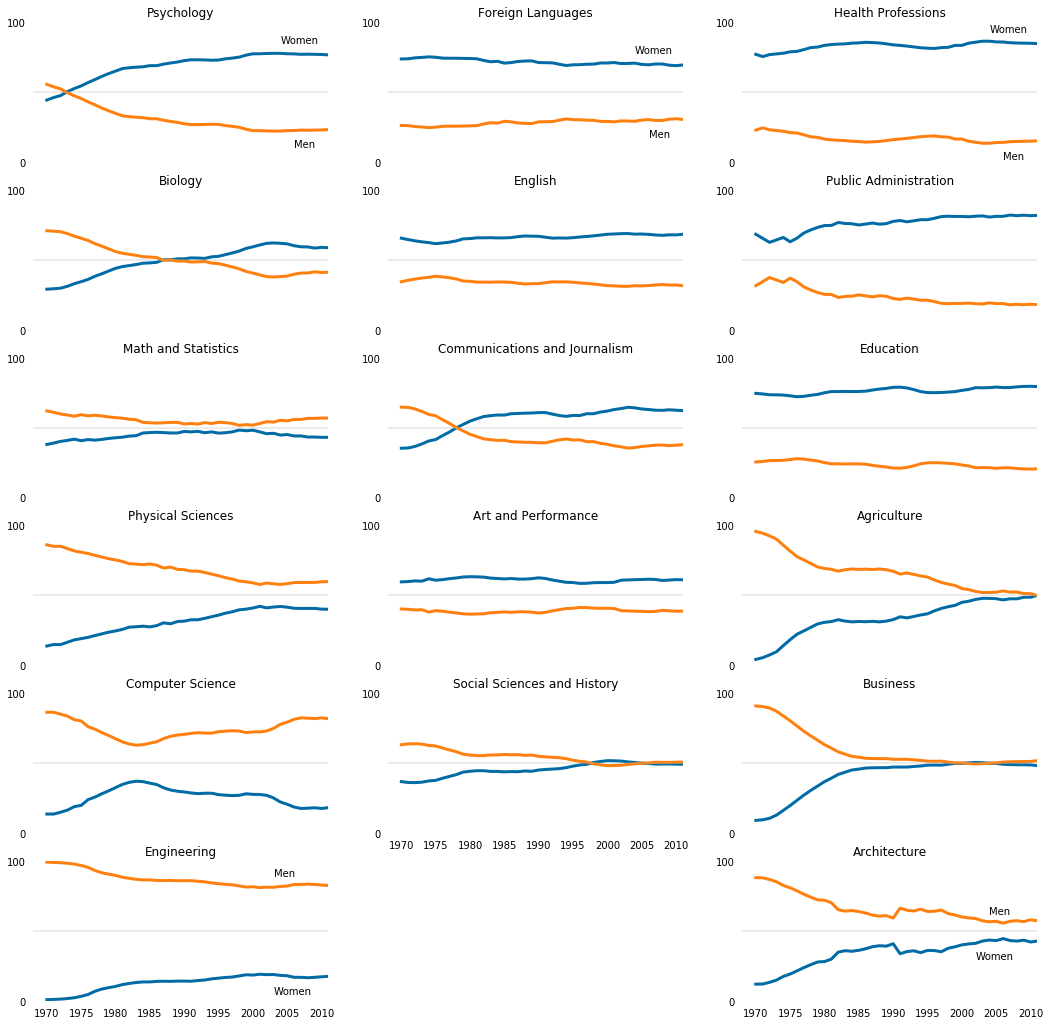

In [7]:
fig = plt.figure(figsize=(18, 18))

all_cats = [stem_cats, lib_arts_cats, other_cats]

# stem_cats
for c in range(0, 3):
    series = all_cats[c]
    for sp in range(0, len(series)):
        position = sp * 3 + c + 1
        ax = fig.add_subplot(6, 3, position)
        ax.plot(women_degrees['Year'], women_degrees[series[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[series[sp]], c=cb_orange, label='Men', linewidth=3)
        
        # gray line at 50%
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        
        for loc in ["right", "left", "top", "bottom"]:
            ax.spines[loc].set_visible(False)
        
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0,100])
        ax.set_title(series[sp])
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
        
        if sp == len(series) - 1:
            ax.tick_params(labelbottom='on')

        if sp == 0:
            if c == 0:
                ax.text(2004, 85, 'Women')
                ax.text(2006, 11, 'Men')
            elif c == 1:
                ax.text(2004, 78, 'Women')
                ax.text(2006, 18, 'Men')
            elif c == 2:
                ax.text(2004, 93, 'Women')
                ax.text(2006, 2, 'Men')
        elif sp == len(series) - 1:
            if c == 0:
                ax.text(2003, 89, 'Men')
                ax.text(2003, 5, 'Women')
            if c == 2:
                ax.text(2004, 62, 'Men')
                ax.text(2002, 30, 'Women')


# Grid - Step 5

If you recall, matplotlib can be used many different ways. It can be used within a Jupyter Notebook interface (like this one), from the command line, or in an integrated development environment. Many of these ways of using matplotlib vary in workflow and handle the rendering of images differently as well. To help support these different use cases, matplotlib can target different outputs or backends. If you import matplotlib and run matplotlib.get_backend(), you'll see the specific backend you're currently using.

With the current backend we're using, we can use Figure.savefig() or pyplot.savefig() to export all of the plots contained in the figure as a single image file. Note that these have to be called before we display the figure using `pyplot.show()`.:

```
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.savefig('biology_degrees.png')
```

In the above code, we saved a line chart as a PNG file. You can read about the different popular file types for images here. The image will be exported into the same folder that your Jupyter Notebook server is running. You can click on the Jupyter logo to navigate the file system and find this image:

Jupyter Logo

Exporting plots we create using matplotlib allows us to use them in Word documents, Powerpoint presentations, and even in emails.

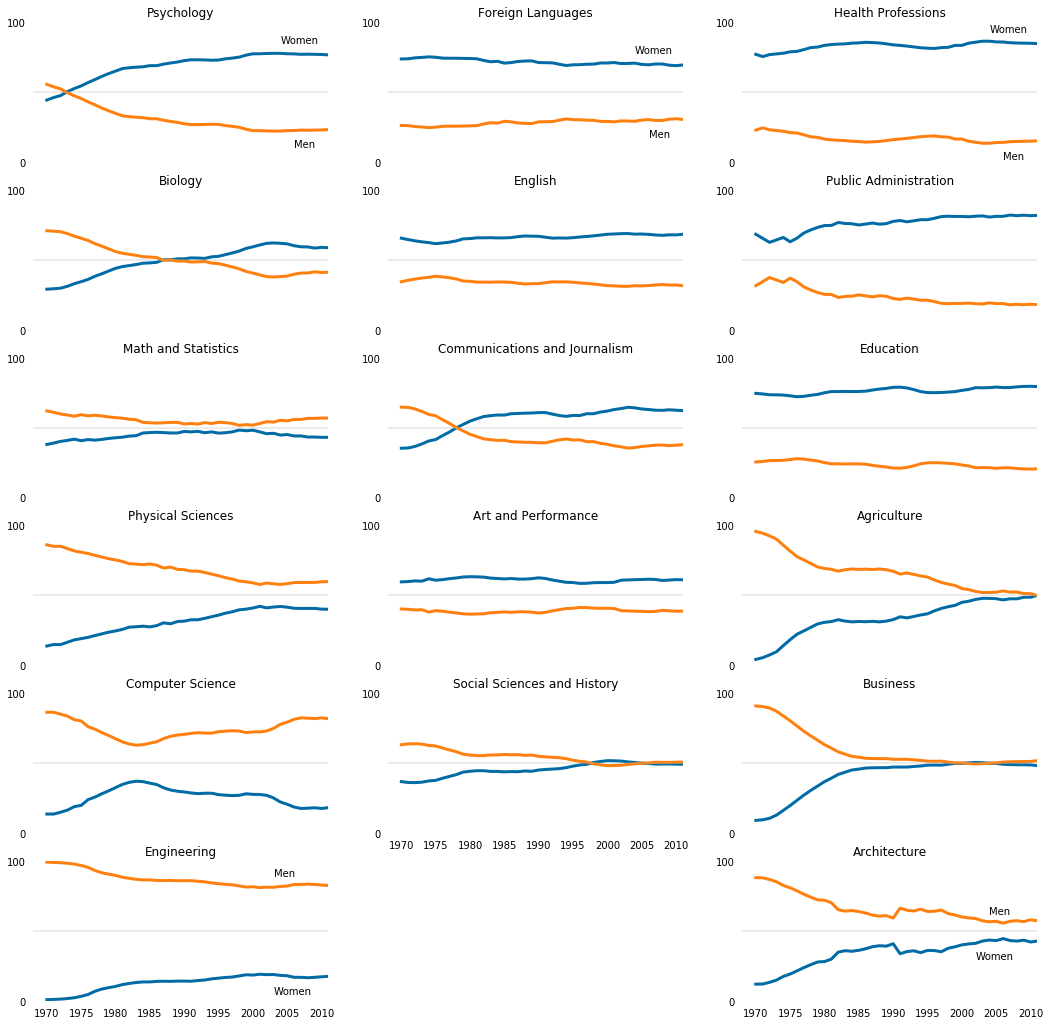

In [8]:
fig = plt.figure(figsize=(18, 18))

all_cats = [stem_cats, lib_arts_cats, other_cats]

# stem_cats
for c in range(0, 3):
    series = all_cats[c]
    for sp in range(0, len(series)):
        position = sp * 3 + c + 1
        ax = fig.add_subplot(6, 3, position)
        ax.plot(women_degrees['Year'], women_degrees[series[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[series[sp]], c=cb_orange, label='Men', linewidth=3)
        
        # gray line at 50%
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        
        for loc in ["right", "left", "top", "bottom"]:
            ax.spines[loc].set_visible(False)
        
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0,100])
        ax.set_title(series[sp])
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
        
        if sp == len(series) - 1:
            ax.tick_params(labelbottom='on')

        if sp == 0:
            if c == 0:
                ax.text(2004, 85, 'Women')
                ax.text(2006, 11, 'Men')
            elif c == 1:
                ax.text(2004, 78, 'Women')
                ax.text(2006, 18, 'Men')
            elif c == 2:
                ax.text(2004, 93, 'Women')
                ax.text(2006, 2, 'Men')
        elif sp == len(series) - 1:
            if c == 0:
                ax.text(2003, 89, 'Men')
                ax.text(2003, 5, 'Women')
            if c == 2:
                ax.text(2004, 62, 'Men')
                ax.text(2002, 30, 'Women')

plt.savefig("gender_degrees.png")